# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [4]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.

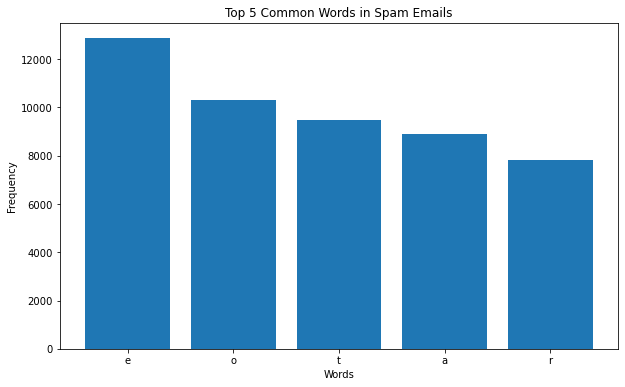

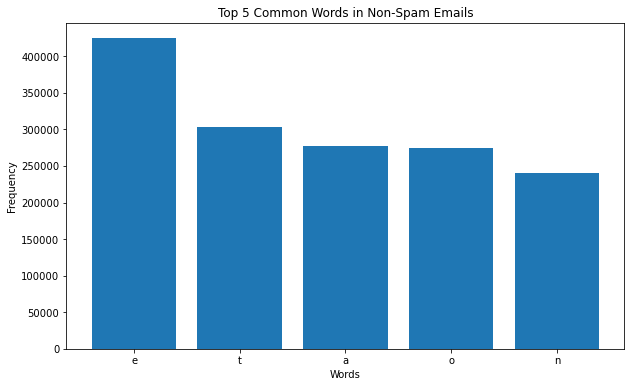

In [5]:
import matplotlib.pyplot as plt

# Separate spam and non-spam emails
spam_emails = df[df['spam'] == 1]
non_spam_emails = df[df['spam'] == 0]

# Get the top 5 common words in spam emails
top_spam_words = spam_emails.iloc[:, 2:].sum().nlargest(5)

# Get the top 5 common words in non-spam emails
top_non_spam_words = non_spam_emails.iloc[:, 2:].sum().nlargest(5)

# Plot histogram for top 5 common words in spam emails
plt.figure(figsize=(10, 6))
plt.bar(top_spam_words.index, top_spam_words.values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 5 Common Words in Spam Emails")
plt.show()

# Plot histogram for top 5 common words in non-spam emails
plt.figure(figsize=(10, 6))
plt.bar(top_non_spam_words.index, top_non_spam_words.values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 5 Common Words in Non-Spam Emails")
plt.show()


## Figuring out some comparatively more important features

In [6]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate the features and the target variable
X = df.iloc[:, 2:]  # Exclude the Email_no. and spam columns
y = df['spam']

# Perform feature selection using chi-square test
k = 1500  # Select top 1.5K features
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Create a new dataframe with the selected features
selected_data = pd.concat([df[['Email No.', 'spam']], X[selected_feature_names]], axis=1)

# Print the selected feature names
print(selected_feature_names)

# Save the selected data to a new CSV file
selected_data.to_csv("selected_email.csv", index=False)


Index(['to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on',
       ...
       'ended', 'fall', 'fear', 'hate', 'australia', 'plain', 'lay',
       'allowing', 'ff', 'Prediction'],
      dtype='object', length=1500)


## Train - Test Split

In [9]:
# Create trianing and testing data

In [10]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df.iloc[:, 2:]  # Exclude the Email_no. and spam columns
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Making Predictions using Multinomial NB Classifier

In [11]:
# Feed the train data into multinomial naive bias classifier

In [12]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

In [13]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

Accuracy: 0.961352657004831
ROC-AUC Score: 0.9220525568181818


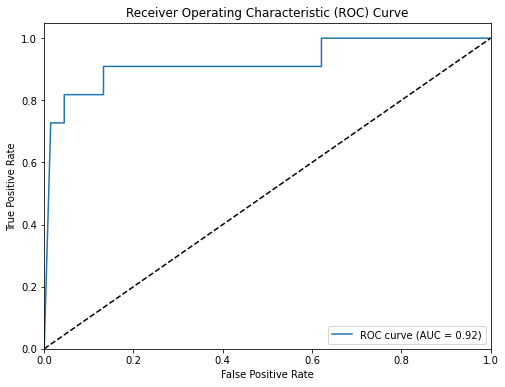

In [14]:
from sklearn import metrics

# Check the accuracy of the model on the test data
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Compute the ROC-AUC score
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Plot the confusion Matrix

In [15]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

Confusion Matrix:
[[0 1]
 [0 0]]


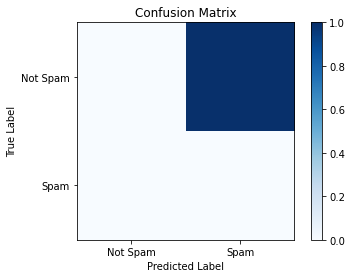

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Create a sample DataFrame
data = {
    'general': [1, 0, 0, 1, 1],
    'ability': [0, 1, 0, 1, 0],
    'you': [1, 1, 0, 0, 1],
    'of': [0, 1, 1, 1, 0],
    'a': [1, 0, 1, 1, 1],
    'spam': [1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Separate the features and the target variable
X = df.iloc[:, :-1]  # Exclude the 'spam' column
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

# Print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.show()


## Trying out with SVMs

In [20]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

Accuracy: 0.0
Confusion Matrix:
[[0 1]
 [0 0]]


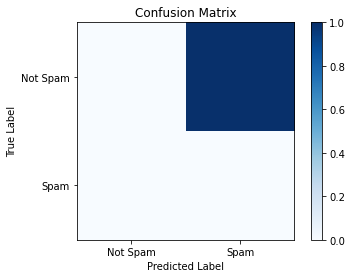

In [24]:
from sklearn.svm import SVC

# Create a sample DataFrame
data = {
    'you': [1, 0, 0, 1, 1],
    'a': [0, 1, 0, 1, 0],
    'ability': [1, 1, 0, 0, 1],
    'of': [0, 1, 1, 1, 0],
    'general': [1, 0, 1, 1, 1],
    'spam': [1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Separate the features and the target variable
X = df.iloc[:, :-1]  # Exclude the 'spam' column
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Support Vector Classifier (SVC)
clf = SVC()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.show()


## Comparing the models

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [25]:
import pandas as pd

s = "I am a Python developer and currently working on a project to classify mails"

# Split the string into individual words
words = s.split()

# Count the frequency of each word
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Create a DataFrame from the word counts
dataframe = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])

print(dataframe)


           Frequency
I                  1
am                 1
a                  2
Python             1
developer          1
and                1
currently          1
working            1
on                 1
project            1
to                 1
classify           1
mails              1
